<h1 style = 'color:#00008B'>Cervical Cancer detection using Machine learning </h1>












### Introduction
According to World Health Organisation (WHO), when detected at an early stage, cervical cancer is one of the most curable cancers. Hence, the main motive behind this project is to detect the cancer in its early stages so that it can be treated and managed in the patients effectively.

### Some facts about Cervical Cancer:
* It is diagnosed most often in women over the age of 30 years.
* The main cause of cervical cancer is long-lasting infection with certain types of human papillomavirus (HPV), which is a common virus that is passed from one person to another during sex.
* At least half of sexually active people will have HPV at some point in their lives, but few women get cervical cancer.

The only procedure that can confirm cervical cancer is a biopsy. But, conducting a biopsy requires medical expertise and sound infrastructure that may not be available in rural and developing areas. The idea here is to employ machine learning models in these areas which will help screen potential patients. <br>
For this project, we used the data of 858 patients collected in a Hospital in Venezuela to train machine learning models in interest of detecting cancer without a biopsy.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### References:

*   *Link to basic information regarding cervical cancer :* https://www.cdc.gov/cancer/cervical/basic_info/index.htm
*   The dataset for tackling the problem is supplied by the UCI repository for Machine Learning.<br>Link to Dataset : https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29 <br>

> The dataset contains a list of risk factors that lead up to the Biopsy examination. The generation of the predictor variable is taken care of in part 2 (Exploratory data analysis) of this report. We will try to predict the 'biopsy' variable from the dataset using Logistic Regression, Random Forest, Bagging with Decision Trees and Boosting with XGBoost Classifier.<br>

<h2 style = 'color:#00008B'>Flow of the project</h2>

<h3>
    This project is divided into 5 parts:<br><br>
    1. Data Cleaning <br><br>
    2. Exploratory Data Analysis <br><br>
    3. Baseline model: Logistic Regression <br><br>
    4. Ensemble Models: Bagging with Decision Trees, Random forest and Boosting <br><br>
    5. Model Comparison and results </h3>

<img src="https://www.iarc.who.int/wp-content/uploads/2021/01/CCAM_Tile_01_zoom.jpg" alt="Snow" style="width:30%">

# Ground Work

In [ ]:
# importing dependencies
%matplotlib inline
import math
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from prettytable import PrettyTable
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from scipy.optimize import minimize_scalar
from matplotlib import pyplot
import statistics
from sklearn.inspection import permutation_importance
import xgboost as xgb

sns.set()

import warnings


In [ ]:
#Defining a function to plot confusion matrix 
def plot_confusion_matrix(y_true, y_pred, model_name):
    fig, ax = plt.subplots(figsize = (10,5))
    mtx = confusion_matrix(y_true, y_pred)
    sns.heatmap(mtx, annot=True, fmt='g', ax=ax)
    
    ax.set_title(f'Confusion Matrix for {model_name}', fontsize = 14)
    ax.xaxis.set_ticklabels(['Does not have cancer', 'Has cancer'])
    ax.yaxis.set_ticklabels(['Does not have cancer', 'Has cancer'])
    plt.ylabel('True label', fontsize = 12)
    plt.xlabel('Predicted label', fontsize = 12)

In [ ]:
#Defining a function to add the results of models built
summary = PrettyTable()
summary.field_names = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'AUC']

def add_results(model_name, accu, prec, rec, f1, auc):
    summary.add_row([f'{model_name}',
                 f'{accu:.2%}',
                 f'{prec:.2%}',
                 f'{rec:.2%}',
                 f'{f1:.2%}',
                 f'{auc:.4f}'])

# Part 1: Data Cleaning

*   In data preprocessing we prepare the raw data, making it suitable for a machine learning model. 
*   While doing any operation, it is mandatory to clean the data and put it in a formatted way. 
*   Data cleaning fixes or removes incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. <br>
*   Having clean data will ultimately increase overall productivity and allow for the highest quality information in your decision-making.<br>

## It involves the following steps

* Getting the dataset
* Identifying missing data
* Making suitable replacements for the missing values
* Splitting dataset into training and test set

<br>



In [ ]:
# reading raw data to pandas
df = pd.read_csv('risk_factors_cervical_cancer.csv')

In [ ]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
# getting more information regarding number of attributes and instances
df.shape

(858, 36)

In [ ]:
# missing data is demarkated as ? in the dataframe
# viewing the number of missing values per column
(df == '?').sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [ ]:
# replacing ? with nan values as they are easier to process in pandas
df.replace('?', np.nan, inplace = True)

In [ ]:
# getting columns sorted by number of nan values
df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)

STDs: Time since last diagnosis       787
STDs: Time since first diagnosis      787
IUD                                   117
IUD (years)                           117
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
STDs:vulvo-perineal condylomatosis    105
STDs:HPV                              105
STDs:Hepatitis B                      105
STDs:HIV                              105
STDs:AIDS                             105
STDs:molluscum contagiosum            105
STDs:genital herpes                   105
STDs:pelvic inflammatory disease      105
STDs:syphilis                         105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:condylomatosis                   105
STDs (number)                         105
STDs                                  105
Num of pregnancies                     56
Number of sexual partners              26
Smokes (packs/year)                    13
Smokes (years)                    

In [ ]:
null_vals = df['STDs: Time since last diagnosis'].isnull().sum()/len(df)
print(f"Two columns in the dataframe: 'STDs: Time since last diagnosis' and 'STDs: Time since first diagnosis' have {null_vals*100:.2f}% null values, hence we are dropping those columns")

Two columns in the dataframe: 'STDs: Time since last diagnosis' and 'STDs: Time since first diagnosis' have 91.72% null values, hence we are dropping those columns


In [ ]:
# dropping columns with many null values
df.drop(['STDs: Time since last diagnosis', 'STDs: Time since first diagnosis'], axis = 1, inplace = True)

In [ ]:
# Filling in Null values with Most occuring value in column
df.fillna(df.mode().T[0], inplace = True)

In [ ]:
# getting descriptive statistics for data
# only some columns are visible as columns with ? were coded with dtype: object
# hence we will have to convert all columns to numeric data types
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# converting all columns to numeric data types
df = df.apply(pd.to_numeric)

In [ ]:
# getting descriptive statistics for entire data now
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.979021,2.192308,0.143357,1.201241,0.446278,0.686480,1.972394,0.096737,...,0.002331,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.644759,2.797653,1.434395,0.350641,4.060623,2.210351,0.464194,3.597888,0.295771,...,0.048252,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# inspecting cervical condylomatosis column
df['STDs:cervical condylomatosis'][df['STDs:cervical condylomatosis'] != 0]

Series([], Name: STDs:cervical condylomatosis, dtype: float64)

In [ ]:
# inspecting AIDS column
df['STDs:AIDS'][df['STDs:AIDS'] != 0]

Series([], Name: STDs:AIDS, dtype: float64)

In [ ]:
# inspecting STDs: genital herpes
df['STDs:genital herpes'][df['STDs:genital herpes'] != 0]

325    1.0
Name: STDs:genital herpes, dtype: float64

In [ ]:
print(f"The column: 'STDs: genital herpes' has only {len(df['STDs:genital herpes'][df['STDs:genital herpes'] != 0])} non zero entry.")

The column: 'STDs: genital herpes' has only 1 non zero entry.


In [ ]:
# inspecting STDs: pelvic inflammatory disease
df['STDs:pelvic inflammatory disease'][df['STDs:pelvic inflammatory disease'] != 0]

826    1.0
Name: STDs:pelvic inflammatory disease, dtype: float64

In [ ]:
print(f"The column: 'STDs:pelvic inflammatory disease' has only {len(df['STDs:pelvic inflammatory disease'][df['STDs:pelvic inflammatory disease'] != 0])} non zero entry.")

The column: 'STDs:pelvic inflammatory disease' has only 1 non zero entry.


* The columns: 'STDs: cervical condylomatosis' and 'STDs:AIDS' have no non zero entries
* The columns: 'STDs:genital herpes' and 'STDs:pelvic inflammatory disease' have only one non zero entry<br>
#### We can infer that no patients had the cervical condylomatosis or AIDS, one patient had genital herpes and one patient had pelvic inflammatory disease.<br>Thus, the above features do not add any new information and are dropped.

In [ ]:
# dropping columns
df.drop(['STDs:cervical condylomatosis', 'STDs:AIDS', 'STDs:genital herpes', 'STDs:pelvic inflammatory disease'], axis = 1, inplace = True)

In [ ]:
# inspecting biopsy for class imbalance
df.groupby('Biopsy').count()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
Biopsy,,,,,,,,,,,,,,,,,,,,,
0,803,803,803,803,803,803,803,803,803,803,...,803,803,803,803,803,803,803,803,803,803
1,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55


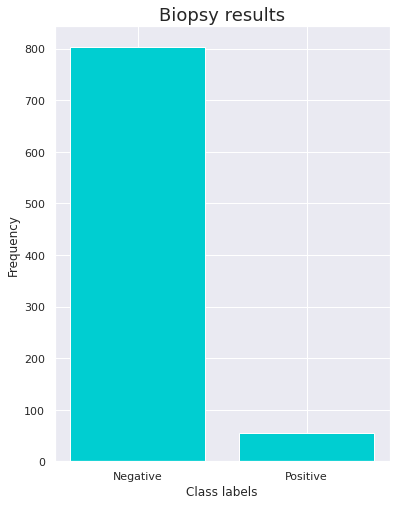

In [ ]:
# plotting biopsy results
plt.figure(figsize = (6, 8))
plt.title('Biopsy results', fontsize = 18)
plt.bar(['Negative', 'Positive'], [803,55], color = 'darkturquoise')
plt.xlabel('Class labels')
plt.ylabel('Frequency')
plt.show()

### From the above bar chart we can infer that there is class imbalance in Biopsy column.<br> Thus, we will do a stratified split.

In [ ]:
# splitting data to train and test dfs stratified by biopsy result column
train_df, test_df = train_test_split(df, test_size = 0.2, stratify = df.Biopsy, random_state = 9)

In [ ]:
# exporting clean, train and test dataframes to CSV
df.to_csv('clean_df.csv', index = False)
train_df.to_csv('train_df.csv', index = False)
test_df.to_csv('test_df.csv', index = False)

<br><br>
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Part 2. Exploratory Data Analysis
> In this section, we perform EDA to analyse our dataset and summarize its main characteristics using statistical graphics and other data visualization methods.

### Histograms of features

In [ ]:
# re-reading clean data and train-test datasets
df = pd.read_csv('clean_df.csv')
train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')

In [ ]:
# list of integer variables (non boolean)
cont_vars = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
             'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)',
             'STDs (number)', 'STDs: Number of diagnosis']

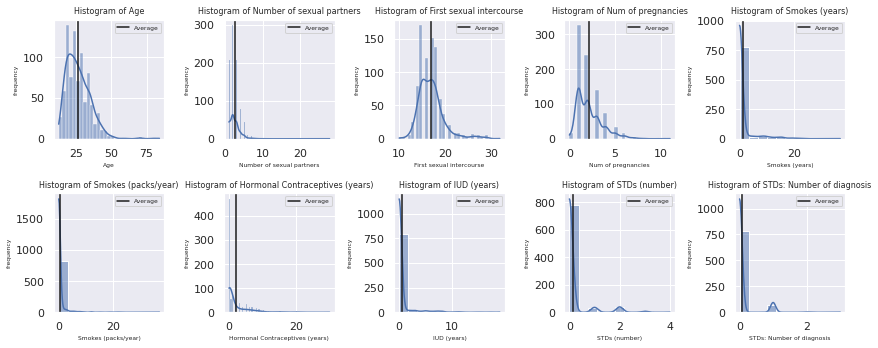

In [ ]:
# plotting histograms for all integer variables
fig=plt.figure(figsize=(12, 5))

for i, col in enumerate(cont_vars):
    ax = plt.subplot(2, 5, i + 1)
    sns.histplot(df[col],kde=True)
    ax.axvline(df[col].mean(), color = 'k', label = 'Average')
    ax.set_title(f'Histogram of {col}', fontsize = 8)
    ax.set_xlabel(f'{col}', fontsize = 6)
    ax.set_ylabel(f'frequency', fontsize = 6)
    ax.legend(fontsize = 6)

fig.tight_layout()
plt.show()

#### From the above plots we derive the following insights:
1. Most people in the dataset are below 60 years of age.
2. Most people in the dataset have had less than 10 sexual partners.
3. On an average, people had their first sexual intercourse below the age of 20.

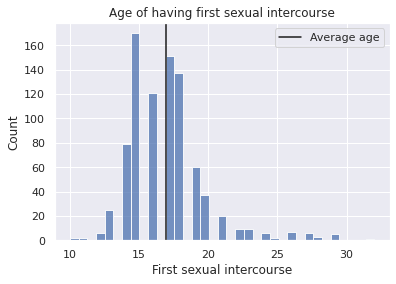

In [ ]:
# closer inspection of first sexual intercourse distribution
sns.histplot(df['First sexual intercourse'])
plt.title('Age of having first sexual intercourse')
plt.axvline(df['First sexual intercourse'].mean(), color = 'k', label = 'Average age')
plt.legend()
plt.show()

#### As we can see from the above plot, most people in the dataset had their first sexual intercourse before the age of 20 years.

In [ ]:
print(f"The highest age of having first sexual intercourse was {df['First sexual intercourse'].max():.0f} and the lowest age was {df['First sexual intercourse'].min():.0f} years")

The highest age of having first sexual intercourse was 32 and the lowest age was 10 years


### Correlation Heatmap of features

In [ ]:
print(f'The entire dataset has {df.shape[0]} rows, train dataset has {train_df.shape[0]} rows and test dataset has {test_df.shape[0]} rows.')

The entire dataset has 858 rows, train dataset has 686 rows and test dataset has 172 rows.


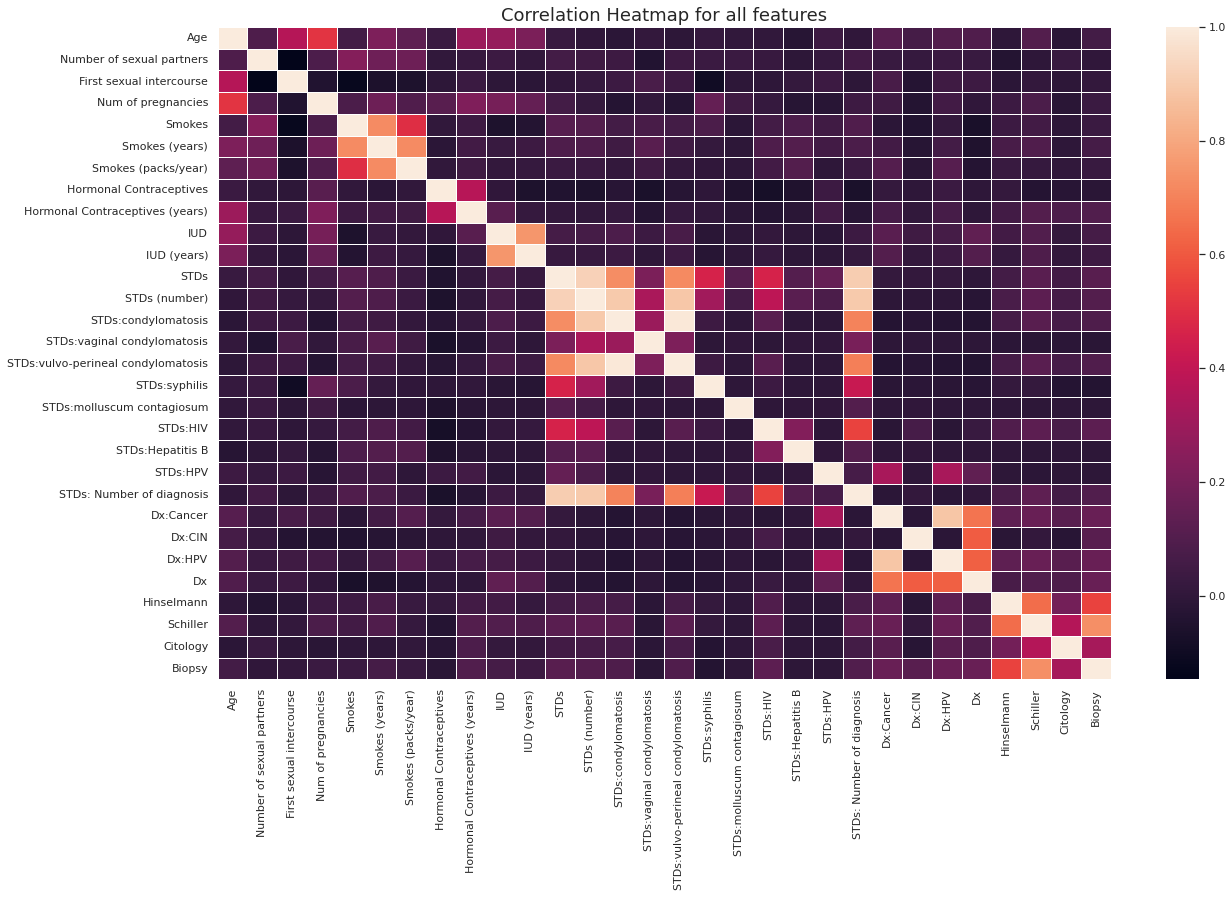

In [ ]:
# plotting a correlation heatmap for all features
plt.figure(figsize = (20, 12))
plt.title('Correlation Heatmap for all features', fontsize = 18)
sns.heatmap(df.corr(), linewidth = .5)
plt.show()

#### From the above heatmap we derive the following insights:
1. Age and number of pregnancies are correlated as older women have more pregnancies on an average.
2. Smokes, Smokes (year) and smokes (packs/year) are also highly correlated as long term smokers are smoking more packs per year as well.
3. STDs column is highly correlated to STDs: condylomatosis suggesting that it is a common STD, it is also correlated with vulvo-perineal condylomatosis suggesting that it is another common STD among the people in this dataset.
4. STDs: Condylomatosis is also highly correlated with STDs: vulvo perinneal condylomatosis, suggesting that Condylomatosis is most commonly found in the vulvo perinneal area.
6. Hinselmann, Schiller and Citology (pap smear test) are also highly correlated with a positive biopsy result, suggesting that patients who pass these tests are at a high risk of having cancer.

### Additional data exploration

In [ ]:
# gaining more insights about factors influencing biopsy results

insights_df = df.groupby('Biopsy').mean()

# getting data regarding percentage change in average of a feature in presence of cancer
insights_df.loc['Perc_diff'] = np.abs((insights_df.iloc[0] - insights_df.iloc[1]) / insights_df.iloc[0])*100

insights_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
Biopsy,,,,,,,,,,,,,,,,,,,,,
0,26.696139,2.511831,16.972603,2.181818,0.140722,1.136236,0.432121,0.688667,1.880230,0.092154,...,0.001245,0.002491,0.079701,0.014944,0.007472,0.014944,0.021171,0.012453,0.032379,0.032379
1,28.636364,2.509091,17.072727,2.345455,0.181818,2.150309,0.652967,0.654545,3.318000,0.163636,...,0.000000,0.000000,0.200000,0.109091,0.054545,0.109091,0.127273,0.454545,0.872727,0.327273
Perc_diff,7.267808,0.109073,0.589919,7.500000,29.203540,89.248390,51.107398,4.954792,76.467806,77.567568,...,100.000000,100.000000,150.937500,630.000000,630.000000,630.000000,501.176471,3550.000000,2595.384615,910.769231


In [ ]:
# making a list of relevant columns with a percentage difference higher than 10%
# and absolute value greater than 0.1 to exclude features with minor impact
relevant_cols = []
for col in insights_df.columns:
    if insights_df[col].loc['Perc_diff'] > 10 and insights_df[col].iloc[1] > 0.1:
        relevant_cols.append(col)

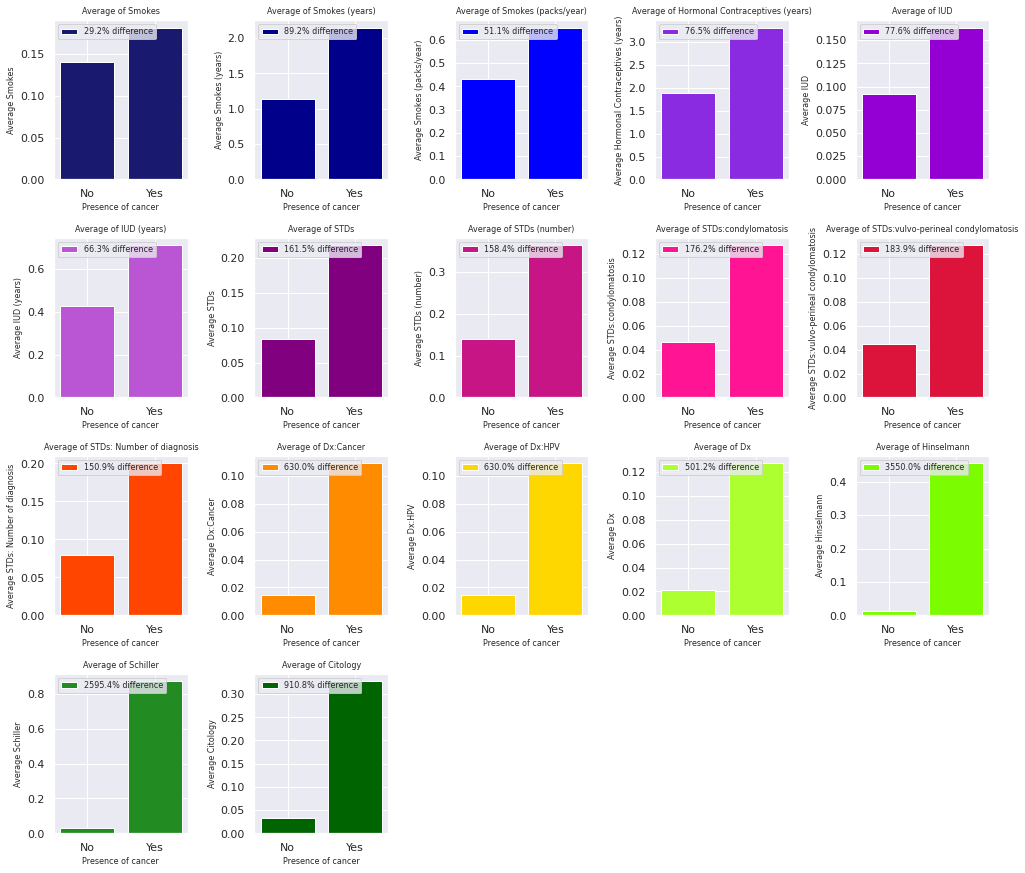

In [ ]:
cols = ['midnightblue','darkblue','blue','blueviolet','darkviolet','mediumorchid','purple','mediumvioletred','deeppink','crimson', 'orangered', 'darkorange','gold', 'greenyellow','lawngreen','forestgreen', 'darkgreen']

fig=plt.figure(figsize=(14, 30))
for i, column in enumerate(relevant_cols):
    ax = plt.subplot(10, 5, i + 1)
    ax.bar(['No', 'Yes'], df.groupby('Biopsy').mean()[f'{column}'], color = cols[i], label = f'{insights_df[column].iloc[2]:.1f}% difference')
    ax.set_title(f"Average of {column}", fontsize = 8)
    ax.set_xlabel('Presence of cancer', fontsize = 8)
    ax.set_ylabel(f'Average {column}', fontsize = 8)
    ax.legend(fontsize = 8, loc ='upper left')

fig.tight_layout()
plt.show()

### The people in whom cancer was detected on average:
1. Smoked 89.2% more years than those who did not have cancer.
2. Smoked 51.1% more packs per year than those who did not have cancer.
3. Took hormonal contraceptives for 76.5% more years than those who did not have cancer.
4. Had an IUD for 66.3% more years than those who did not have cancer.
5. Had 1.5 times more STDs than those who did not have cancer.
6. Pased Hinselmann test 35 times more than those who did not have cancer.
7. Passed Schiller test 25 times more than those who did not have cancer
8. Passed Pap smear test 9 times more than those who did not have cancer.

<br><br>
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Part 3: Baseline Model: Logistic regression
> Aim: To create a baseline model against which we compare the performance of ensemble models in predicting biopsy results.

In [ ]:
#Assign predictor and response variables
X_train, y_train = train_df.drop(['Biopsy'], axis = 1), train_df.Biopsy
X_test, y_test = test_df.drop(['Biopsy'], axis = 1), test_df.Biopsy

## Logistic Regression hyperparameter tuning
> Aim: Regularisation of the model to help reduce its variance and aid the model in achieving better generalisation/performance.<br>Additionally, we customised our threshold such that it maximises the F1 score.

In [ ]:
#Initialise c values for regularisation
c_values = [10**-3, 10**-2, 10**-1, 10**1, 10**2, 10**3]

In [ ]:
#Split the train set into train and validation set to find the best c value and threshold
#for our logistic regression problem

x_t, x_val, y_t, y_val = train_test_split(X_train, y_train, stratify=train_df['Biopsy'], train_size = 0.8, random_state = 0)

thresh = []
f1_list = []

for c in c_values:
    model = LogisticRegression(C = c, max_iter = 20000)
    model.fit(x_t, y_t)
    predictions = model.predict(x_val)
    predicted_proba = model.predict_proba(x_val)
    
    false_pos_rate, true_pos_rate, proba = roc_curve(y_val, predicted_proba[:, -1])
    
    optimal_proba_cutoff = sorted(list(zip(np.abs(true_pos_rate - false_pos_rate), proba)), key=lambda i: i[0], reverse=True)[0][1]
    roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in predicted_proba[:, -1]]
    
    model_f1 = f1_score(y_val, roc_predictions)
    
    thresh.append(optimal_proba_cutoff)
    f1_list.append(model_f1)

best_c = c_values[f1_list.index(max(f1_list))]
best_thresh = thresh[c_values.index(best_c)]

In [ ]:
#Initialise a LogisticRegression model using best_c
#Fit on the training set and predict probabilities on the test set

lreg = LogisticRegression(C = best_c, max_iter = 20000)
lreg.fit(X_train, y_train)

y_probs1 = lreg.predict_proba(X_test)
y_probs1 = y_probs1[:,1]

In [ ]:
#Calculate the fpr, tpr and thresholds
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probs1)

#Predict using the best_thresh on the test set
y_pred1 = [1 if i >= best_thresh else 0 for i in y_probs1]

#Calculate AUROC
lreg_auc = roc_auc_score(y_test, y_probs1)

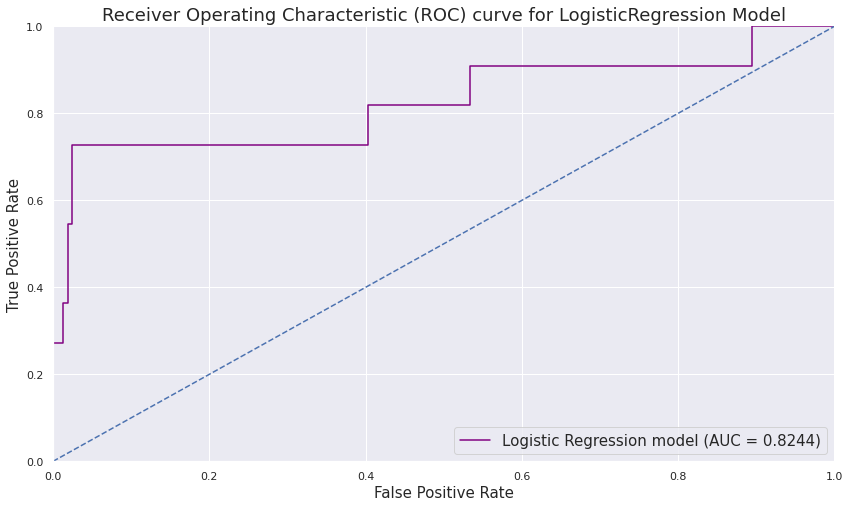

In [ ]:
#Plot the ROC curve
fig, ax = plt.subplots(figsize=(14,8))

ax.plot(fpr1, tpr1, color = 'purple', label = f'Logistic Regression model (AUC = {lreg_auc:.4f})')
ax.plot([0,1],[0,1],'--')

ax.set_xlim([0,1])
ax.set_ylim([0,1])

ax.set_xlabel('False Positive Rate', fontsize = 15)
ax.set_ylabel('True Positive Rate', fontsize = 15)
ax.set_title('Receiver Operating Characteristic (ROC) curve for LogisticRegression Model',fontsize = 18)
ax.legend(loc='lower right',fontsize=15)
sns.despine()

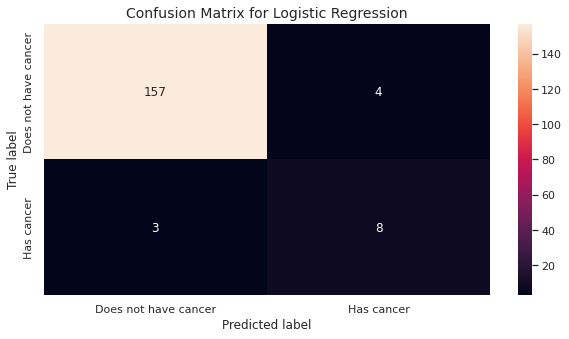

In [ ]:
#Confusion matrix for our model
plot_confusion_matrix(y_test, y_pred1, 'Logistic Regression')

In [ ]:
#Compute accuracy, precision, recall and f1 score for logistic regression model with threshold = best_thresh

lreg_accu = accuracy_score(y_test, y_pred1)
lreg_prec = precision_score(y_test, y_pred1)
lreg_rec = recall_score(y_test, y_pred1)
lreg_f1 = f1_score(y_test, y_pred1)

In [ ]:
#Summary
add_results('Logistic Regression', lreg_accu, lreg_prec, lreg_rec, lreg_f1, lreg_auc)

print('The results of the models used so far are summarised in the table below:')
print(summary)


The results of the models used so far are summarised in the table below:
+---------------------+----------+-----------+--------+----------+--------+
|        Model        | Accuracy | Precision | Recall | F1 score |  AUC   |
+---------------------+----------+-----------+--------+----------+--------+
| Logistic Regression |  95.93%  |   66.67%  | 72.73% |  69.57%  | 0.8244 |
+---------------------+----------+-----------+--------+----------+--------+


Next, we will analyse which predictors are the most important. We'll compare the importance of the features used in our model by ranking them on the basis of their $t$-test values and $p$-values.

In [ ]:
#Fitting the LogisticRegression model with best c for multiple bootstraps and obtaining coefficient distribution
num_boot = 100
coeff_dist = []

for i in range(num_boot):
    df_new = train_df.sample(frac = 1, replace = True)
    
    X = df_new.drop('Biopsy', axis=1)
    y = df_new.Biopsy
    
    logreg = LogisticRegression(C = best_c, max_iter = 20000)
    logreg.fit(X, y)
    
    coeff_dist.append(logreg.coef_[0][:])

#Convert the above list into an array
coeff_dist = np.array(coeff_dist)

In [ ]:
# Helper function to compute the t-statistic 
def get_t(arr):
    means = np.abs(arr.mean(axis=0))
    stds = arr.std(axis=0)
    return np.divide(means,stds)

In [ ]:
# Use the helper function get_t to find the T-test values
tt = get_t(coeff_dist)
n = train_df.shape[0]

# Get the t-value associated with each predictor
tt_dict = dict(zip(train_df.columns[:-1], tt))
predictors, tvalues = list(zip(*sorted(tt_dict.items(), key=lambda x:x[1])))

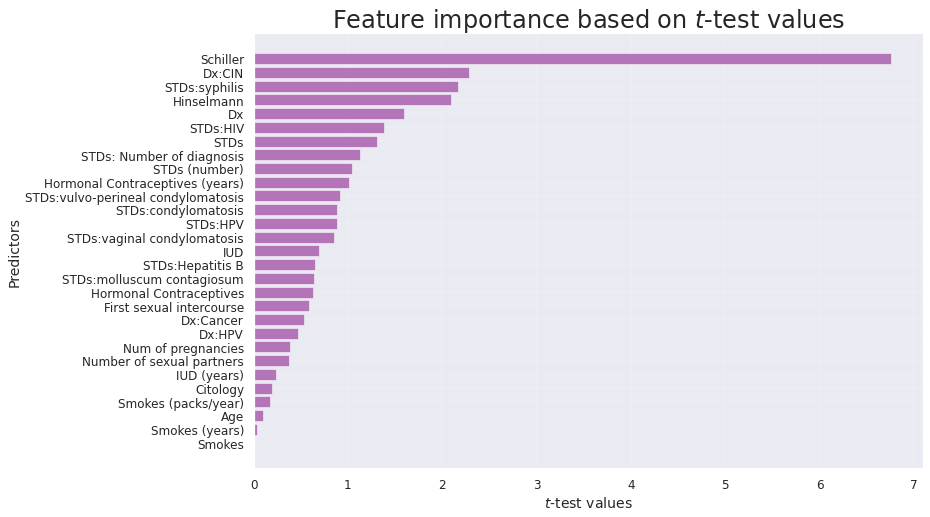

In [ ]:
# Helper code below to visualise the t-values
fig, ax = plt.subplots(figsize = (12, 8))

ax.barh(predictors, tvalues, align = 'center', color = 'purple', alpha = 0.5)
ax.grid(linewidth = 0.2)

ax.set_title('Feature importance based on $t$-test values', fontsize = 24)
ax.set_xlabel('$t$-test values', fontsize = 14)
ax.set_ylabel('Predictors', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()


In [ ]:
# From t-test values compute the p values using scipy.stats T-distribution function
pval = stats.t.sf(tt, n-1)*2

# Since p values are in reversed order, we find the 'confidence' which is 1-p
conf = 1-pval

# Get the 'confidence' values associated with each predictor
conf_dict = dict(zip(train_df.columns[:-1], conf))
predictors, confs = list(zip(*sorted(conf_dict.items(), key=lambda x:x[1])))

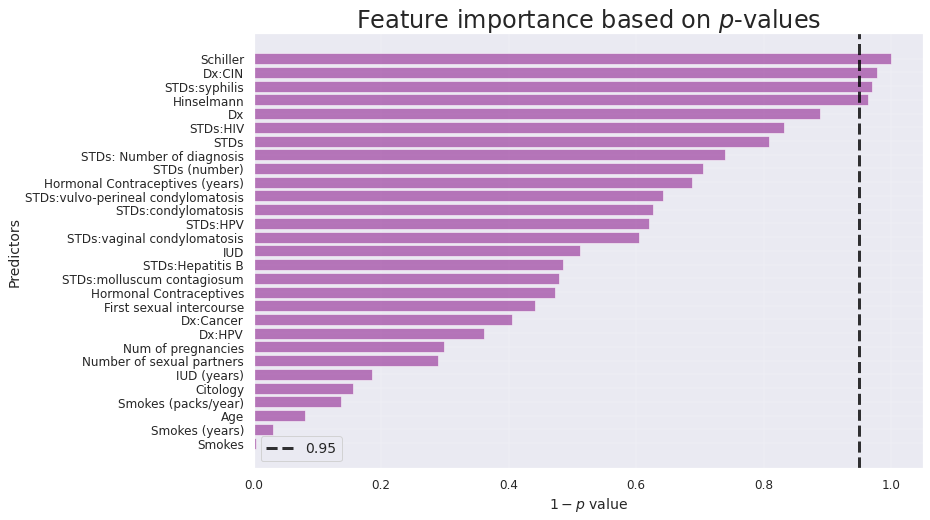

In [ ]:
# Helper code below to visualise the confidence values
fig, ax = plt.subplots(figsize = (12, 8))

ax.barh(predictors, confs, align = 'center', color = 'purple', alpha = 0.5)
ax.grid(linewidth = 0.2)
ax.axvline(x = 0.95, linewidth=3, linestyle = '--', color = 'black', alpha = 0.8, label = '0.95')

ax.set_title('Feature importance based on $p$-values', fontsize = 24)
ax.set_xlabel('$1-p$ value', fontsize = 14)
ax.set_ylabel('Predictors', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

ax.legend(loc = 'best', fontsize = 14)
plt.show()

<br><br>
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Part 4: Ensemble Models
> Ensemble methods is a machine learning technique that combines several base
models in order to produce one optimal predictive model.<br>
The two main reasons why we used these models are:<br>
Performance: An ensemble can make better predictions and achieve better performance than any single contributing model.<br>
Robustness: An ensemble reduces the spread or dispersion of the predictions and model performance.

## Ensemble Model I: Bagging with base model Decision Tree

In [ ]:
#Initialise the hyperparameters

#max depth of each tree in bagging
max_depth = [10, 15, 20, 50, 100]

#no. of trees/bootstraps
n_estimators = [50, 100, 150, 200]

#defining parameter grid for gridsearch
param_grid = {'base_estimator__max_depth': max_depth, 'n_estimators': n_estimators}

In [ ]:
#Defining our estimator (Bagging Classifier) for gridsearch
bag_est = BaggingClassifier(base_estimator = DecisionTreeClassifier(class_weight = 'balanced'), random_state = 42)

In [ ]:
#Performing gridsearch to find the best model
model = GridSearchCV(bag_est, param_grid, scoring = 'f1', cv = 10)

In [ ]:
#Fit the model on the training set 
model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                                         random_state=42),
             param_grid={'base_estimator__max_depth': [10, 15, 20, 50, 100],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1')

In [ ]:
#Find and print the best parameters
print(model.best_params_)

{'base_estimator__max_depth': 10, 'n_estimators': 150}


In [ ]:
#Find and print the best estimator which is using the best parameters
print(model.best_estimator_)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=10),
                  n_estimators=150, random_state=42)


In [ ]:
#The best estimator returned by grid search will be our bagging model
bag = model.best_estimator_

In [ ]:
#Fit bagging model on the training set and predict on the test set
bag.fit(X_train, y_train)
y_pred2 = bag.predict(X_test)

In [ ]:
#Calculate probabilities on the test set
y_probs2 = bag.predict_proba(X_test)
y_probs2 = y_probs2[:,1]

In [ ]:
#Calculate the fpr, tpr and thresholds
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_probs2)

#Calculate AUROC
bag_auc = roc_auc_score(y_test, y_probs2)

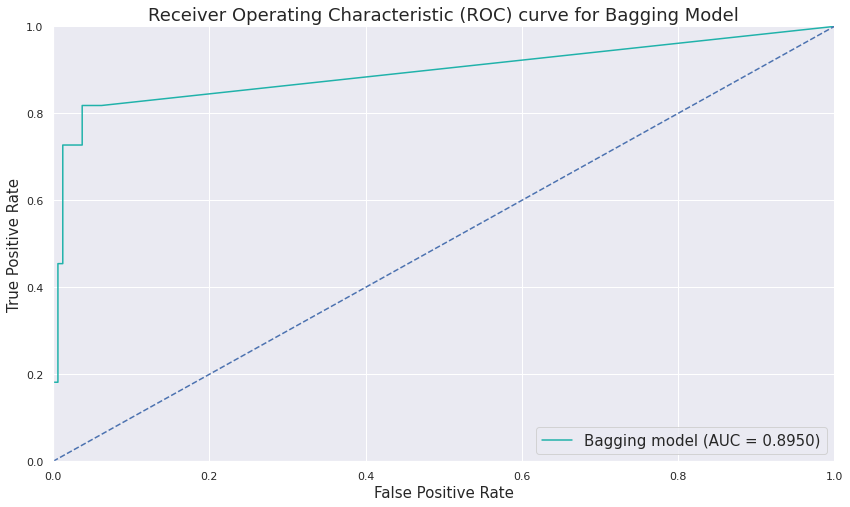

In [ ]:
#Plot the ROC curve
fig, ax = plt.subplots(figsize=(14,8))

ax.plot(fpr2, tpr2, color = 'lightseagreen', label = f'Bagging model (AUC = {bag_auc:.4f})')
ax.plot([0,1],[0,1],'--')

ax.set_xlim([0,1])
ax.set_ylim([0,1])

ax.set_title('Receiver Operating Characteristic (ROC) curve for Bagging Model',fontsize = 18)
ax.set_xlabel('False Positive Rate', fontsize = 15)
ax.set_ylabel('True Positive Rate', fontsize = 15)
ax.legend(loc='lower right',fontsize=15)
sns.despine()

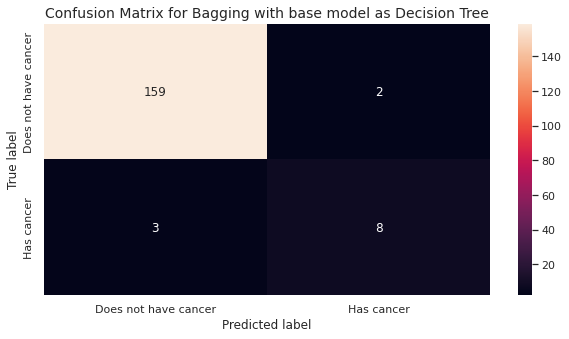

In [ ]:
#Confusion matrix for our model
plot_confusion_matrix(y_test, y_pred2, 'Bagging with base model as Decision Tree')

In [ ]:
#Compute accuracy, precision, recall and f1 score for the bagging model with decision tree as its base model

bagging_accu = accuracy_score(y_test, y_pred2)
bagging_prec = precision_score(y_test, y_pred2)
bagging_rec = recall_score(y_test, y_pred2)
bagging_f1 = f1_score(y_test, y_pred2)

In [ ]:
#Summary
add_results('Bagging with base model as Decision Tree', bagging_accu, bagging_prec, bagging_rec, bagging_f1, bag_auc)

print('The results of the models used so far are summarised in the table below:')
print(summary)

The results of the models used so far are summarised in the table below:
+------------------------------------------+----------+-----------+--------+----------+--------+
|                  Model                   | Accuracy | Precision | Recall | F1 score |  AUC   |
+------------------------------------------+----------+-----------+--------+----------+--------+
|           Logistic Regression            |  95.93%  |   66.67%  | 72.73% |  69.57%  | 0.8244 |
| Bagging with base model as Decision Tree |  97.09%  |   80.00%  | 72.73% |  76.19%  | 0.8950 |
+------------------------------------------+----------+-----------+--------+----------+--------+


In [ ]:
#Compute the importance of all predictors based on permutation feature importance
importance = permutation_importance(bag, X_train, y_train, n_repeats = 10)

#Get the mean and std of feature importance over n_repeats = 10 for each predictor
mean = importance.importances_mean
std = importance.importances_std

In [ ]:
#List of predictors
predictors = list(X_train.columns)

#Get the indexes to sort mean feature importance
idx = np.argsort(np.abs(mean))

#Rearrange the predictors, mean and std lists using the indexes obtained above
predictors = [predictors[i] for i in idx]
mean = mean[idx]
std = std[idx]

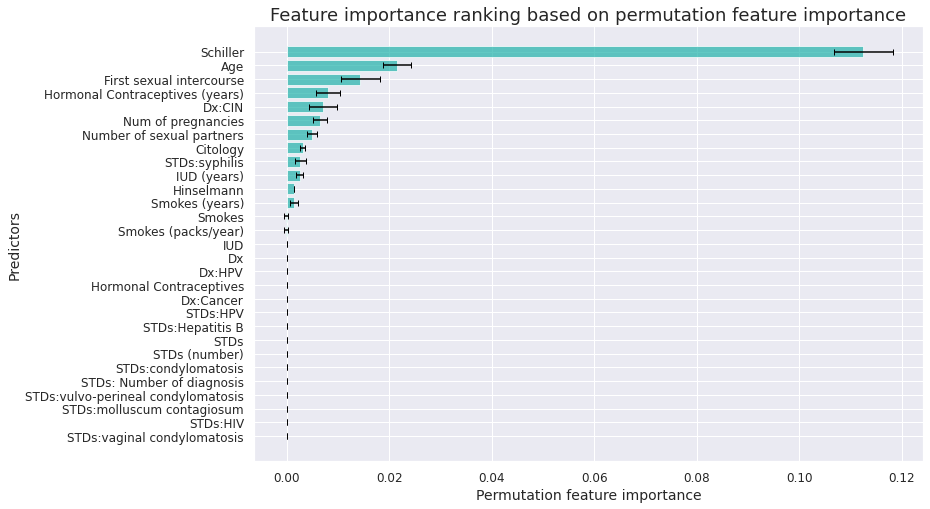

In [ ]:
#Visualizing the importance of all predictors based on permutation feature importance

fig, ax = plt.subplots(figsize = (12, 8))

ax.barh(predictors, mean, xerr = std, align = 'center', color = 'lightseagreen', alpha = 0.7,
        ecolor = 'black', capsize = 3)

ax.set_title('Feature importance ranking based on permutation feature importance', fontsize = 18)
ax.set_xlabel('Permutation feature importance', fontsize = 14)
ax.set_ylabel('Predictors', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [ ]:
#We focus on the predictors with nonzero permutation feature importance
nonzero_predictors, nonzero_mean, nonzero_std = [], [], []
for i in range(len(predictors)):
    if mean[i]!=0:
        nonzero_predictors.append(predictors[i])
        nonzero_mean.append(mean[i])
        nonzero_std.append(std[i])

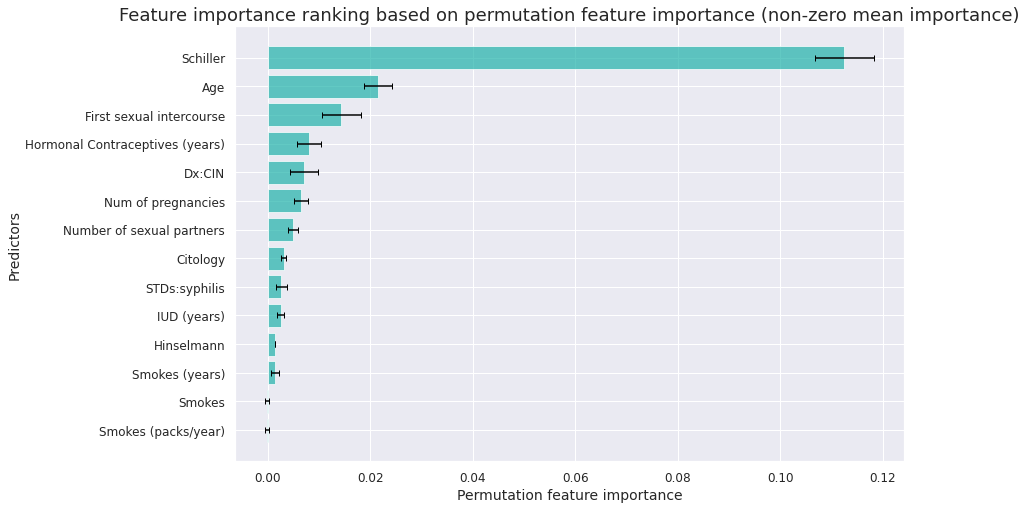

In [ ]:
#Visualizing the importance of the predictors with nonzero permutation feature importance

fig, ax = plt.subplots(figsize = (12, 8))

ax.barh(nonzero_predictors, nonzero_mean, xerr = nonzero_std, align = 'center', color = 'lightseagreen', alpha = 0.7,
        ecolor = 'black', capsize = 3)

ax.set_title('Feature importance ranking based on permutation feature importance (non-zero mean importance)', fontsize = 18)
ax.set_xlabel('Permutation feature importance', fontsize = 14)
ax.set_ylabel('Predictors', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

## Ensemble Model II: Random Forest models
<br>
We have tried 3 different approaches using Random Forest.
<br>

*   Vanilla Random Forest<br>
*   Random Forest Model with Upsampling and Class weight<br>
*   Random Forest Model with Downsampling

Here, we performed Hyperparameter tuning on <br>


*  max_depth: Maximum depth of trees trained at each split.
*  n_estimator: The number of trees in the forest.
*  max_features: The sampling scheme: number of features to consider at any given split.
<br>

We have used cross-validation to find the hyperparameter and the scoring was done through F1 score



In [ ]:
#Define a function to add the results of all random forest models built
forests = PrettyTable()
forests.field_names = ['Random Forest Model Type', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'AUC']

def forest_results(model_type, accu, prec, rec, f1, auc):
    forests.add_row([f'{model_type}',
                 f'{accu:.2%}',
                 f'{prec:.2%}',
                 f'{rec:.2%}',
                 f'{f1:.2%}',
                 f'{auc:.4f}'])

**Vanilla Random Forest Model:**

In [ ]:
#Hyperparameter lists
max_depth_list = [4, 6, 8, 10, 12]
n_estimator_list = np.linspace(10, 50, 5).astype(int)
max_features_list = [18, 19, 20, 21]
random_state = 42

In [ ]:
#Hyperparameter tuning using nested loops in order to optimise f1 score

#Dictionary to store f1 scores for all possible combinations of hyperparameters
f1_dict = {}

#Tuning
for max_depth in max_depth_list:
    for n_estimators in n_estimator_list:
        for max_features in max_features_list:
            rf_model = RandomForestClassifier(max_depth = max_depth, 
                                              n_estimators = n_estimators, 
                                              max_features = max_features,
                                              random_state = random_state)
            cv_score = cross_val_score(rf_model, X_train, y_train, cv = 5, scoring = 'f1')
            mean_f1 = np.mean(cv_score)
            f1_dict[(max_depth, n_estimators, max_features)] = mean_f1

In [ ]:
#Find and print the hyperparameters which resulted in the best f1 score
best_f1 = max(f1_dict.values())
best_params = [key  for (key, value) in f1_dict.items() if value == best_f1][0]

print(f'The best max_depth, n_estimators and max_features combination to optimise f1 score for our random forest model is:\n{best_params}')

The best max_depth, n_estimators and max_features combination to optimise f1 score for our random forest model is:
(4, 50, 18)


In [ ]:
#Initialise a vanilla random forest model using the hyperparameters obtained above

vanilla_rf = RandomForestClassifier(max_depth = best_params[0],
                                    n_estimators = best_params[1],
                                    max_features = best_params[2],
                                    random_state = random_state)

#Fit on the training set and predict on the test set
vanilla_rf.fit(X_train, y_train)
y_pred_vrf = vanilla_rf.predict(X_test)

#Calculate probabilities on the test set
y_probs_vrf = vanilla_rf.predict_proba(X_test)[:, 1]

In [ ]:
#Calculate AUROC
vrf_auc = roc_auc_score(y_test, y_probs_vrf)

#Calculate accuracy, precision, recall and f1 score for vanilla random forest
vrf_accu = accuracy_score(y_test, y_pred_vrf)
vrf_prec = precision_score(y_test, y_pred_vrf)
vrf_rec = recall_score(y_test, y_pred_vrf)
vrf_f1 = f1_score(y_test, y_pred_vrf)

In [ ]:
#Add the scores to the forests table and print it
forest_results('Vanilla RF', vrf_accu, vrf_prec, vrf_rec, vrf_f1, vrf_auc)

print('The results of the Random Forest models used so far are summarised in the table below:')
print(forests)

The results of the Random Forest models used so far are summarised in the table below:
+--------------------------+----------+-----------+--------+----------+--------+
| Random Forest Model Type | Accuracy | Precision | Recall | F1 score |  AUC   |
+--------------------------+----------+-----------+--------+----------+--------+
|        Vanilla RF        |  95.93%  |   66.67%  | 72.73% |  69.57%  | 0.8450 |
+--------------------------+----------+-----------+--------+----------+--------+


**Random Forest Model with Upsampling:**

In [ ]:
#Upsample the training set
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
#Hyperparameter lists
max_depth_list = [12, 14, 16, 18, 20]
n_estimator_list = [5, 10, 15, 20, 25]
max_features_list = [17, 19, 21, 23, 25]

In [ ]:
#Hyperparameter tuning using nested loops in order to optimise f1 score

#Dictionary to store f1 scores for all possible combinations of hyperparameters
f1_dict = {}

#Tuning
#This time, we use class weights as well
for max_depth in max_depth_list:
    for n_estimators in n_estimator_list:
        for max_features in max_features_list:
            rf_model = RandomForestClassifier(max_depth = max_depth, 
                                              n_estimators = n_estimators, 
                                              max_features = max_features,
                                              class_weight = {1:0.9, 0:0.1},
                                              random_state = random_state)
            cv_score = cross_val_score(rf_model, X_train_res, y_train_res, cv = 5, scoring = 'f1')
            mean_f1 = np.mean(cv_score)
            f1_dict[(max_depth, n_estimators, max_features)] = mean_f1

In [ ]:
#Find and print the hyperparameters which resulted in the best f1 score
best_f1 = max(f1_dict.values())
best_params = [key  for (key, value) in f1_dict.items() if value == best_f1][0]

print(f'The best max_depth, n_estimators and max_features combination to optimise f1 score for our random forest model\nwith upsampling is: {best_params}')

The best max_depth, n_estimators and max_features combination to optimise f1 score for our random forest model
with upsampling is: (14, 25, 17)


In [ ]:
#Initialise a random forest model using the hyperparameters and the upsampled training set obtained above

up_rf = RandomForestClassifier(max_depth = best_params[0],
                               n_estimators = best_params[1],
                               max_features = best_params[2],
                               class_weight = {1:0.9, 0:0.1},
                               random_state = random_state)

#Fit on the training set and predict on the test set
up_rf.fit(X_train_res, y_train_res)
y_pred_uprf = up_rf.predict(X_test)

#Calculate probabilities on the test set
y_probs_uprf = up_rf.predict_proba(X_test)[:, 1]

In [ ]:
#Calculate AUROC
uprf_auc = roc_auc_score(y_test, y_probs_uprf)

#Calculate accuracy, precision, recall and f1 score for random forest with upsampling
uprf_accu = accuracy_score(y_test, y_pred_uprf)
uprf_prec = precision_score(y_test, y_pred_uprf)
uprf_rec = recall_score(y_test, y_pred_uprf)
uprf_f1 = f1_score(y_test, y_pred_uprf)

In [ ]:
#Add the scores to the forests table and print it
forest_results('RF with Upsampling', uprf_accu, uprf_prec, uprf_rec, uprf_f1, uprf_auc)

print('The results of the Random Forest models used so far are summarised in the table below:')
print(forests)

The results of the Random Forest models used so far are summarised in the table below:
+--------------------------+----------+-----------+--------+----------+--------+
| Random Forest Model Type | Accuracy | Precision | Recall | F1 score |  AUC   |
+--------------------------+----------+-----------+--------+----------+--------+
|        Vanilla RF        |  95.93%  |   66.67%  | 72.73% |  69.57%  | 0.8450 |
|    RF with Upsampling    |  97.09%  |   80.00%  | 72.73% |  76.19%  | 0.8673 |
+--------------------------+----------+-----------+--------+----------+--------+


**Random Forest Model with Downsampling**

In [ ]:
#Downsampling the training set
rs = RandomUnderSampler(random_state = 2)
X_train_res, y_train_res = rs.fit_resample(X_train, y_train)

In [ ]:
#Hyperparameter lists
max_depth_list = [3, 4, 5, 6, 7]
n_estimator_list = [11, 12, 13, 14, 15]
max_features_list = [4, 5, 6, 7, 8]

In [ ]:
#Hyperparameter tuning using nested loops in order to optimise f1 score

#Dictionary to store f1 scores for all possible combinations of hyperparameters
f1_dict = {}

#Tuning
for max_depth in max_depth_list:
    for n_estimators in n_estimator_list:
        for max_features in max_features_list:
            rf_model = RandomForestClassifier(max_depth = max_depth, 
                                              n_estimators = n_estimators, 
                                              max_features = max_features,
                                              random_state = random_state)
            cv_score = cross_val_score(rf_model, X_train_res, y_train_res, cv = 5, scoring = 'f1')
            mean_f1 = statistics.mean(cv_score)
            f1_dict[(max_depth, n_estimators, max_features)] = mean_f1

In [ ]:
#Find and print the hyperparameters which resulted in the best f1 score
best_f1 = max(f1_dict.values())
best_params = [key  for (key, value) in f1_dict.items() if value == best_f1][0]

print(f'The best max_depth, n_estimators and max_features combination to optimise f1 score for our random forest model\nwith downsampling is: {best_params}')

The best max_depth, n_estimators and max_features combination to optimise f1 score for our random forest model
with downsampling is: (4, 11, 5)


In [ ]:
#Initialise a random forest model using the hyperparameters and the downsampled training set obtained above

down_rf = RandomForestClassifier(max_depth = best_params[0],
                                 n_estimators = best_params[1],
                                 max_features = best_params[2],
                                 random_state = random_state)

#Fit on the training set and predict on the test set
down_rf.fit(X_train_res, y_train_res)
y_pred_drf = down_rf.predict(X_test)

#Calculate probabilities on the test set
y_probs_drf = down_rf.predict_proba(X_test)[:, 1]

In [ ]:
#Calculate AUROC
drf_auc = roc_auc_score(y_test, y_probs_drf)

#Calculate accuracy, precision, recall and f1 score for random forest with upsampling
drf_accu = accuracy_score(y_test, y_pred_drf)
drf_prec = precision_score(y_test, y_pred_drf)
drf_rec = recall_score(y_test, y_pred_drf)
drf_f1 = f1_score(y_test, y_pred_drf)

In [ ]:
#Add the scores to the forests table and print it
forest_results('RF with Downsampling', drf_accu, drf_prec, drf_rec, drf_f1, drf_auc)

print('The results of the Random Forest models used so far are summarised in the table below:')
print(forests)

The results of the Random Forest models used so far are summarised in the table below:
+--------------------------+----------+-----------+--------+----------+--------+
| Random Forest Model Type | Accuracy | Precision | Recall | F1 score |  AUC   |
+--------------------------+----------+-----------+--------+----------+--------+
|        Vanilla RF        |  95.93%  |   66.67%  | 72.73% |  69.57%  | 0.8450 |
|    RF with Upsampling    |  97.09%  |   80.00%  | 72.73% |  76.19%  | 0.8673 |
|   RF with Downsampling   |  95.93%  |   66.67%  | 72.73% |  69.57%  | 0.9065 |
+--------------------------+----------+-----------+--------+----------+--------+


<b><i> Conclusion: </i></b> After comparing the results of all the above random forest models, we conclude the following: <br>
Best Random Forest model - <b><u> Random Forest with Upsampling and class weights </u></b>

In [ ]:
#3rd model predictions & probabilities
y_pred3, y_probs3 = y_pred_uprf, y_probs_uprf

#Calculate the fpr, tpr and thresholds for the best random forest model
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_probs3)

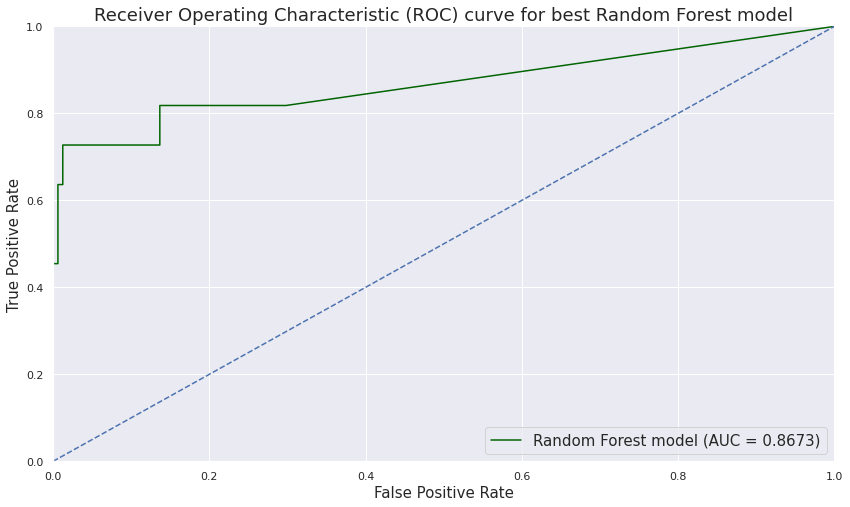

In [ ]:
#Plot the ROC curve
fig, ax = plt.subplots(figsize=(14,8))

ax.plot(fpr3, tpr3, color = 'darkgreen', label = f'Random Forest model (AUC = {uprf_auc:.4f})')
ax.plot([0,1],[0,1],'--')

ax.set_xlim([0,1])
ax.set_ylim([0,1])

ax.set_title('Receiver Operating Characteristic (ROC) curve for best Random Forest model',fontsize = 18)
ax.set_xlabel('False Positive Rate', fontsize = 15)
ax.set_ylabel('True Positive Rate', fontsize = 15)
ax.legend(loc='lower right',fontsize=15)
sns.despine()

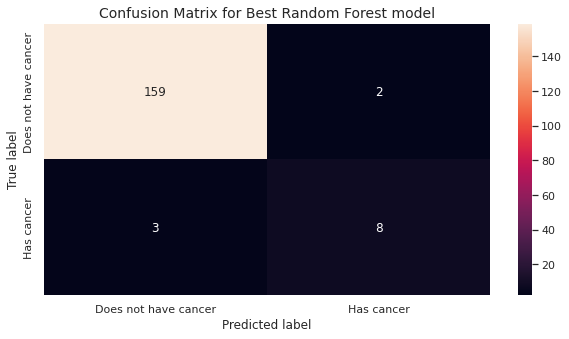

In [ ]:
#Confusion matrix for best random forest model
plot_confusion_matrix(y_test, y_pred3, 'Best Random Forest model')

In [ ]:
#Add the best random forest model to our summary
add_results('Random Forest with Upsampling and class weights', uprf_accu, uprf_prec, uprf_rec, uprf_f1, uprf_auc)

print('The results of the models used so far are summarised in the table below:')
print(summary)

The results of the models used so far are summarised in the table below:
+-------------------------------------------------+----------+-----------+--------+----------+--------+
|                      Model                      | Accuracy | Precision | Recall | F1 score |  AUC   |
+-------------------------------------------------+----------+-----------+--------+----------+--------+
|               Logistic Regression               |  95.93%  |   66.67%  | 72.73% |  69.57%  | 0.8244 |
|     Bagging with base model as Decision Tree    |  97.09%  |   80.00%  | 72.73% |  76.19%  | 0.8950 |
| Random Forest with Upsampling and class weights |  97.09%  |   80.00%  | 72.73% |  76.19%  | 0.8673 |
+-------------------------------------------------+----------+-----------+--------+----------+--------+


In [ ]:
#Impurity based feature importance of best Random Forest model for all predictors
impurity_fi = up_rf.feature_importances_
predictors = list(X_train.columns)

#Sorting the feature importance
idx = np.argsort(impurity_fi)

impurity_fi = impurity_fi[idx]
predictors = [predictors[i] for i in idx]

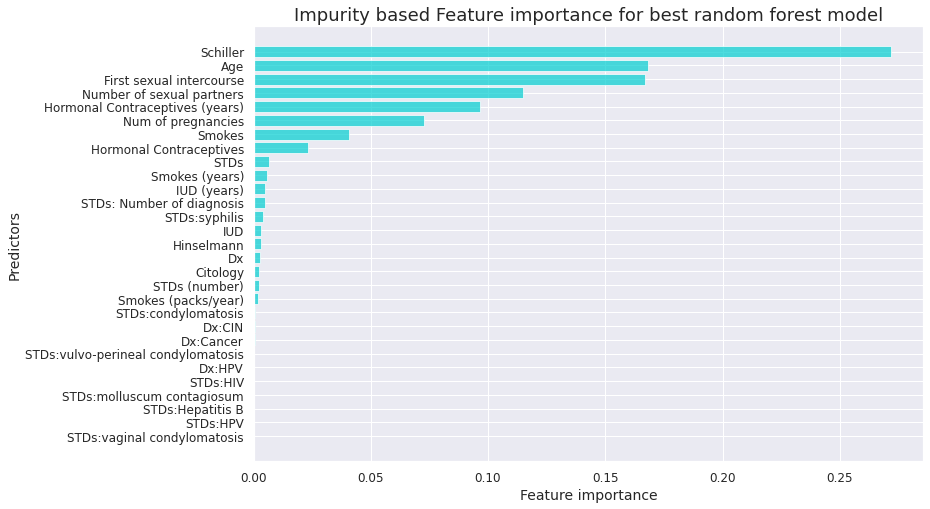

In [ ]:
#Visualizing the impurity based feature importance of all predictors

fig, ax = plt.subplots(figsize = (12, 8))

ax.barh(predictors, impurity_fi, align = 'center', color = 'darkturquoise', alpha = 0.7)

ax.set_title('Impurity based Feature importance for best random forest model', fontsize = 18)
ax.set_xlabel('Feature importance', fontsize = 14)
ax.set_ylabel('Predictors', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [ ]:
#We focus on the predictors with nonzero feature importance
nonzero_predictors, nonzero_impurity_fi = [], []
for i in range(len(predictors)):
    if impurity_fi[i]!=0:
        nonzero_predictors.append(predictors[i])
        nonzero_impurity_fi.append(impurity_fi[i])

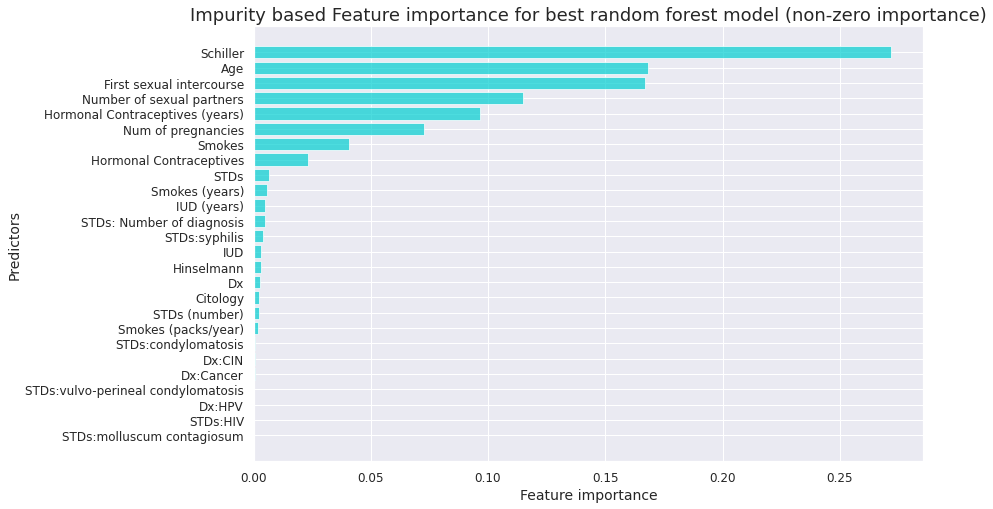

In [ ]:
#Visualizing the importance of the predictors with nonzero impurity based feature importance

fig, ax = plt.subplots(figsize = (12, 8))

ax.barh(nonzero_predictors, nonzero_impurity_fi, align = 'center', color = 'darkturquoise', alpha = 0.7)

ax.set_title('Impurity based Feature importance for best random forest model (non-zero importance)', fontsize = 18)
ax.set_xlabel('Feature importance', fontsize = 14)
ax.set_ylabel('Predictors', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [ ]:
#Permutation feature importance of the best random forest model

#Compute the importance of all predictors based on permutation feature importance
perm_fi = permutation_importance(up_rf, X_train, y_train, n_repeats = 10)

#Get the mean and std of feature importance over n_repeats = 10 for each predictor
mean = perm_fi.importances_mean
std = perm_fi.importances_std

In [ ]:
#List of predictors
predictors = list(X_train.columns)

#Get the indexes to sort mean feature importance
idx = np.argsort(np.abs(mean))

#Rearrange the predictors, mean and std lists using the indexes obtained above
predictors = [predictors[i] for i in idx]
mean = mean[idx]
std = std[idx]

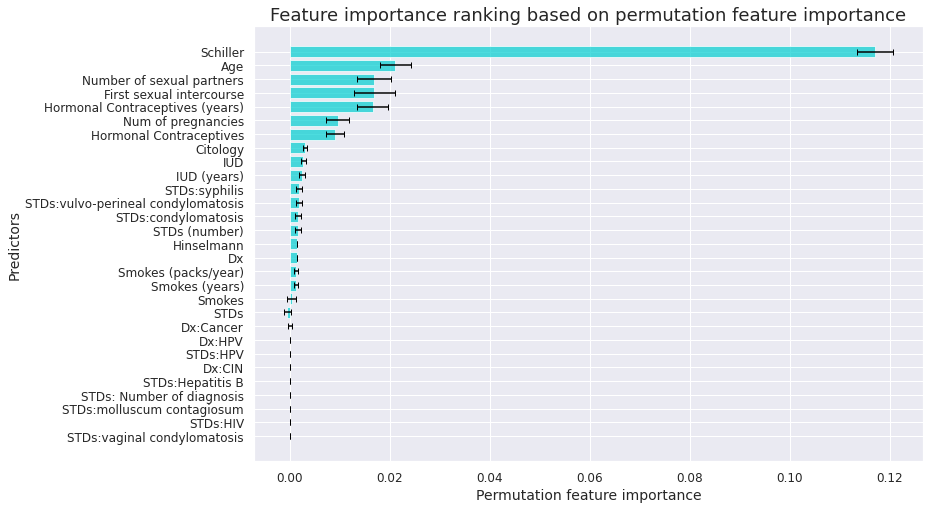

In [ ]:
#Visualizing the importance of all predictors based on permutation feature importance for best random forest model

fig, ax = plt.subplots(figsize = (12, 8))

ax.barh(predictors, mean, xerr = std, align = 'center', color = 'darkturquoise', alpha = 0.7,
        ecolor = 'black', capsize = 3)

ax.set_title('Feature importance ranking based on permutation feature importance', fontsize = 18)
ax.set_xlabel('Permutation feature importance', fontsize = 14)
ax.set_ylabel('Predictors', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [ ]:
#We focus on the predictors with nonzero permutation feature importance
nonzero_predictors, nonzero_mean, nonzero_std = [], [], []
for i in range(len(predictors)):
    if mean[i]!=0:
        nonzero_predictors.append(predictors[i])
        nonzero_mean.append(mean[i])
        nonzero_std.append(std[i])

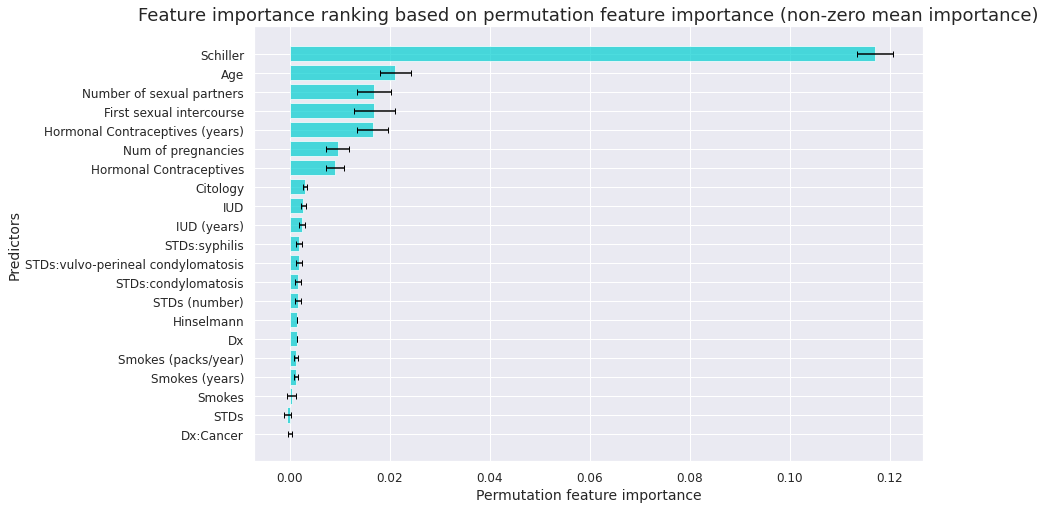

In [ ]:
#Visualizing the importance of the predictors with nonzero permutation feature importance for best random forest model

fig, ax = plt.subplots(figsize = (12, 8))

ax.barh(nonzero_predictors, nonzero_mean, xerr = nonzero_std, align = 'center', color = 'darkturquoise', alpha = 0.7,
        ecolor = 'black', capsize = 3)

ax.set_title('Feature importance ranking based on permutation feature importance (non-zero mean importance)', fontsize = 18)
ax.set_xlabel('Permutation feature importance', fontsize = 14)
ax.set_ylabel('Predictors', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

## Ensemble Model III: Boosting
We used 7 parameters for gridsearch for XGBoost:

*   max_depth : Maximum depth of trees trained at each split.
*   learning_rate : Learning rate shrinks the contribution of each tree by learning_rate value
*   gamma : Minimum loss reduction required to make a further partition on a leaf node of the tree
*   reg_lambda : L2 regularization term on weights. Increasing this value will make model more conservative.
*   scale_pos_weight : Control the balance of positive and negative weights, useful for unbalanced classes
*   subsample : Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees.
*   colsample_bytree : It is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.

Here we have used grid search to find the optimal hyperparameter values for boosting with random forest. The scoring method for the griod search is F1 score as before. 

In [ ]:
#Setting parameters for gridsearch for XGBoost
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5]
}

In [ ]:
#declaring XGboost init
xgb_cl = xgb.XGBClassifier(objective = "binary:logistic")

In [ ]:
#init gridsearch
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs = -1, cv = 5, scoring = "f1")

In [ ]:
#Fit the model on the training set
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 7], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.8]},
             scoring='f1')

In [ ]:
##Find and print the best validation F1 score
print(grid_cv.best_score_)

0.7580966319542171


In [ ]:
#Find and print the best parameters
print(grid_cv.best_params_)

{'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'reg_lambda': 10, 'scale_pos_weight': 5, 'subsample': 0.8}


In [ ]:
#Find and print the best estimator which is using the best parameters
print(grid_cv.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=10, ...)


In [ ]:
#Build boosting model using grid search results
boost = grid_cv.best_estimator_

#Fit on the training set and predict on the test set
boost.fit(X_train, y_train)
y_pred4 = boost.predict(X_test)

In [ ]:
#Calculate probabilities on the test set
y_probs4 = boost.predict_proba(X_test)
y_probs4 = y_probs4[:,1]

#Calculate the fpr, tpr and thresholds
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_probs4)

#Calculate AUROC
boost_auc = roc_auc_score(y_test, y_probs4)

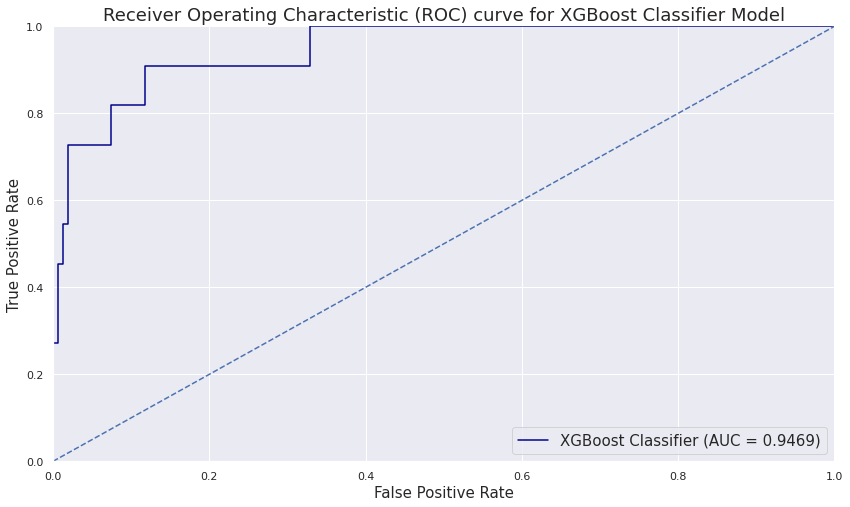

In [ ]:
#Plot the ROC curve
fig, ax = plt.subplots(figsize=(14,8))

ax.plot(fpr4, tpr4, color = 'darkblue', label = f'XGBoost Classifier (AUC = {boost_auc:.4f})')
ax.plot([0,1],[0,1],'--')

ax.set_xlim([0,1])
ax.set_ylim([0,1])

ax.set_title('Receiver Operating Characteristic (ROC) curve for XGBoost Classifier Model',fontsize = 18)
ax.set_xlabel('False Positive Rate', fontsize = 15)
ax.set_ylabel('True Positive Rate', fontsize = 15)
ax.legend(loc='lower right',fontsize=15)
sns.despine()

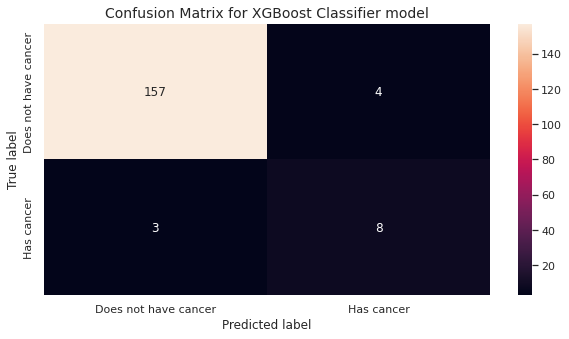

In [ ]:
#Confusion matrix for our model
plot_confusion_matrix(y_test, y_pred4, 'XGBoost Classifier model')

In [ ]:
#Compute accuracy, precision, recall and f1 score for the bagging model with decision tree as its base model

boost_accu = accuracy_score(y_test, y_pred4)
boost_prec = precision_score(y_test, y_pred4)
boost_rec = recall_score(y_test, y_pred4)
boost_f1 = f1_score(y_test, y_pred4)

In [ ]:
#Summary
add_results('XGBoost Classifier', boost_accu, boost_prec, boost_rec, boost_f1, boost_auc)

print('The results of the models used so far are summarised in the table below:')
print(summary)

The results of the models used so far are summarised in the table below:
+-------------------------------------------------+----------+-----------+--------+----------+--------+
|                      Model                      | Accuracy | Precision | Recall | F1 score |  AUC   |
+-------------------------------------------------+----------+-----------+--------+----------+--------+
|               Logistic Regression               |  95.93%  |   66.67%  | 72.73% |  69.57%  | 0.8244 |
|     Bagging with base model as Decision Tree    |  97.09%  |   80.00%  | 72.73% |  76.19%  | 0.8950 |
| Random Forest with Upsampling and class weights |  97.09%  |   80.00%  | 72.73% |  76.19%  | 0.8673 |
|                XGBoost Classifier               |  95.93%  |   66.67%  | 72.73% |  69.57%  | 0.9469 |
+-------------------------------------------------+----------+-----------+--------+----------+--------+


In [ ]:
#Feature importance of all predictors for Boosting model
boosting_fi = boost.feature_importances_
predictors = list(X_train.columns)

#Sorting the feature importance
idx = np.argsort(boosting_fi)

boosting_fi = boosting_fi[idx]
predictors = [predictors[i] for i in idx]

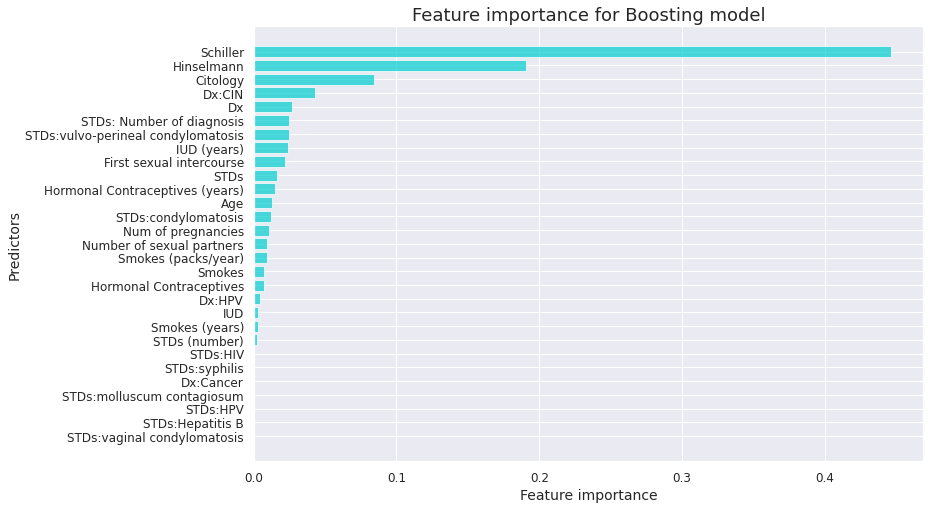

In [ ]:
#Visualizing the feature importance of all predictors

fig, ax = plt.subplots(figsize = (12, 8))

ax.barh(predictors, boosting_fi, align = 'center', color = 'darkturquoise', alpha = 0.7)

ax.set_title('Feature importance for Boosting model', fontsize = 18)
ax.set_xlabel('Feature importance', fontsize = 14)
ax.set_ylabel('Predictors', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [ ]:
#We focus on the predictors with nonzero feature importance
nonzero_predictors, nonzero_boosting_fi = [], []
for i in range(len(predictors)):
    if boosting_fi[i]!=0:
        nonzero_predictors.append(predictors[i])
        nonzero_boosting_fi.append(boosting_fi[i])

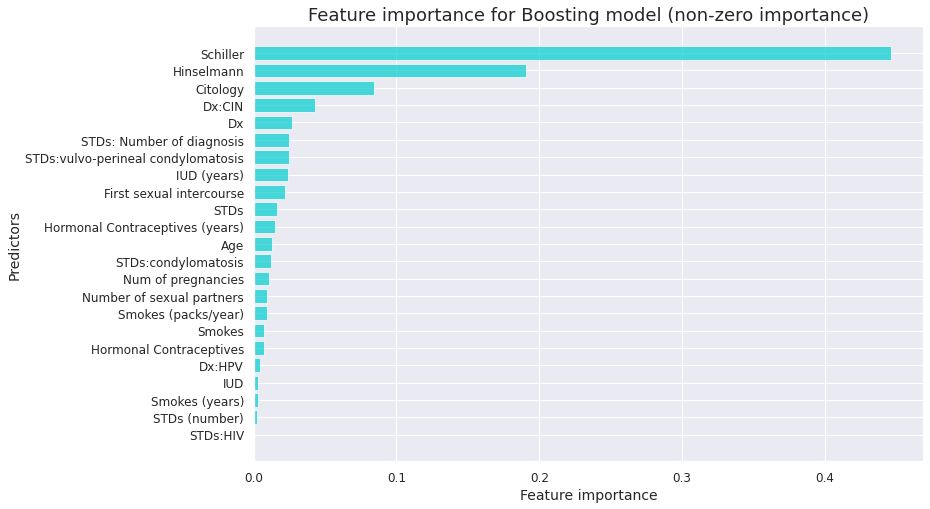

In [ ]:
#Visualizing the importance of the predictors with nonzero feature importance

fig, ax = plt.subplots(figsize = (12, 8))

ax.barh(nonzero_predictors, nonzero_boosting_fi, align = 'center', color = 'darkturquoise', alpha = 0.7)

ax.set_title('Feature importance for Boosting model (non-zero importance)', fontsize = 18)
ax.set_xlabel('Feature importance', fontsize = 14)
ax.set_ylabel('Predictors', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

<br><br>
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Part 5: Model comparison and results

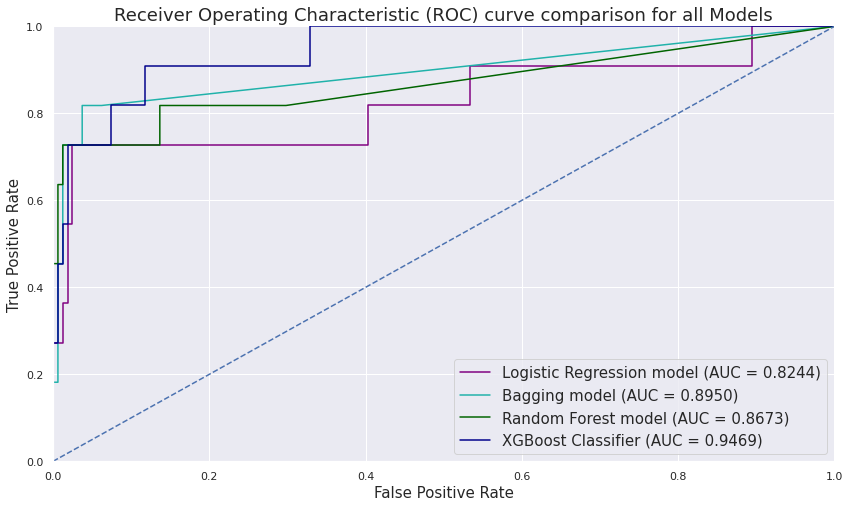

In [ ]:
#Plot the ROC for all the models

fig, ax = plt.subplots(figsize=(14,8))

ax.plot(fpr1, tpr1, color = 'purple', label = f'Logistic Regression model (AUC = {lreg_auc:.4f})')
ax.plot(fpr2, tpr2, color = 'lightseagreen', label = f'Bagging model (AUC = {bag_auc:.4f})')
ax.plot(fpr3, tpr3, color = 'darkgreen', label = f'Random Forest model (AUC = {uprf_auc:.4f})')
ax.plot(fpr4, tpr4, color = 'darkblue', label = f'XGBoost Classifier (AUC = {boost_auc:.4f})')
ax.plot([0,1],[0,1],'--')

ax.set_xlim([0,1])
ax.set_ylim([0,1])

ax.set_title('Receiver Operating Characteristic (ROC) curve comparison for all Models',fontsize = 18)
ax.set_xlabel('False Positive Rate', fontsize = 15)
ax.set_ylabel('True Positive Rate', fontsize = 15)
ax.legend(loc='lower right',fontsize=15)
sns.despine()

In [ ]:
#Scores of all models

print('The scores obtained by all the models so far are summarised below:')
print(summary)

The scores obtained by all the models so far are summarised below:
+-------------------------------------------------+----------+-----------+--------+----------+--------+
|                      Model                      | Accuracy | Precision | Recall | F1 score |  AUC   |
+-------------------------------------------------+----------+-----------+--------+----------+--------+
|               Logistic Regression               |  95.93%  |   66.67%  | 72.73% |  69.57%  | 0.8244 |
|     Bagging with base model as Decision Tree    |  97.09%  |   80.00%  | 72.73% |  76.19%  | 0.8950 |
| Random Forest with Upsampling and class weights |  97.09%  |   80.00%  | 72.73% |  76.19%  | 0.8673 |
|                XGBoost Classifier               |  95.93%  |   66.67%  | 72.73% |  69.57%  | 0.9469 |
+-------------------------------------------------+----------+-----------+--------+----------+--------+


In [ ]:
# converting prettytable to pandas dataframe to plot graphs
my_dict = dict()
for title, col in zip(summary.field_names, np.array(summary.rows).T):
    my_dict[title] = col
    
stats_df = pd.DataFrame(my_dict)
stats_df

,Model,Accuracy,Precision,Recall,F1 score,AUC
0,Logistic Regression,95.93%,66.67%,72.73%,69.57%,0.8244
1,Bagging with base model as Decision Tree,97.09%,80.00%,72.73%,76.19%,0.8950
2,Random Forest with Upsampling and class weights,97.09%,80.00%,72.73%,76.19%,0.8673
3,XGBoost Classifier,95.93%,66.67%,72.73%,69.57%,0.9469


In [ ]:
# converting columns from object data type to float
for col in stats_df[['Accuracy', 'Precision', 'Recall', 'F1 score', 'AUC']]:
    stats_df[col] = stats_df[col].str.rstrip('%').astype('float')

In [ ]:
# converting AUC to percentage value for plotting
stats_df['AUC'] = stats_df['AUC']*100

In [ ]:
stats_df['Ticks'] = ['Logistic Regression', 'Bagging', 'Random Forest', 'XGBoost']

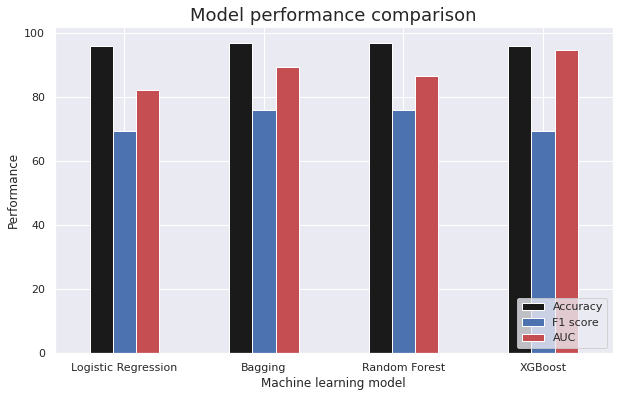

In [ ]:
# plotting F1 score, accuracy and ROC AUC for all models
stats_df.plot(x="Ticks", y=['Accuracy', 'F1 score', 'AUC'], kind="bar", figsize = (10, 6), color = ['k', 'b', 'r'])
plt.xticks(rotation = 'horizontal')
plt.xlabel('Machine learning model')
plt.ylabel('Performance')
plt.title('Model performance comparison', fontsize = 18)
plt.legend(loc = 'lower right')
plt.show()

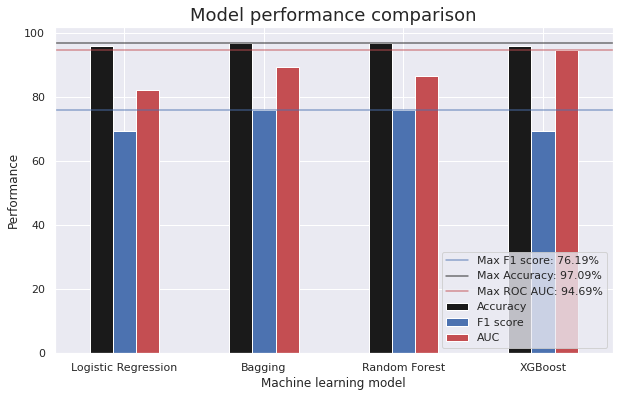

In [ ]:
# plotting with horizontal lines for best metrics by models
stats_df.plot(x="Ticks", y=['Accuracy', 'F1 score', 'AUC'], kind="bar", figsize = (10, 6), color = ['k', 'b', 'r'])
plt.xticks(rotation = 'horizontal')
plt.xlabel('Machine learning model')
plt.axhline(stats_df['F1 score'].max(), label = f"Max F1 score: {stats_df['F1 score'].max()}%", alpha = .6)
plt.axhline(stats_df['Accuracy'].max(), label = f"Max Accuracy: {stats_df['Accuracy'].max()}%", color ='k', alpha = 0.6)
plt.axhline(stats_df['AUC'].max(), label = f"Max ROC AUC: {stats_df['AUC'].max():.2f}%", color ='r', alpha = 0.6)
plt.ylabel('Performance')
plt.title('Model performance comparison', fontsize = 18)
plt.legend(loc = 'lower right')
plt.show()

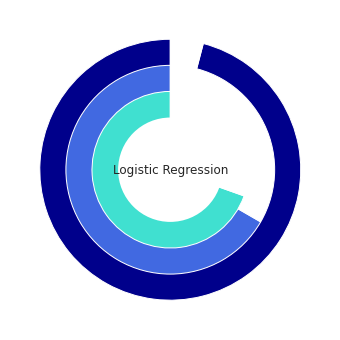

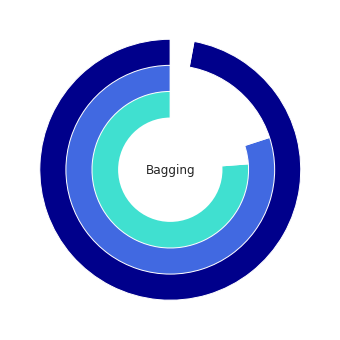

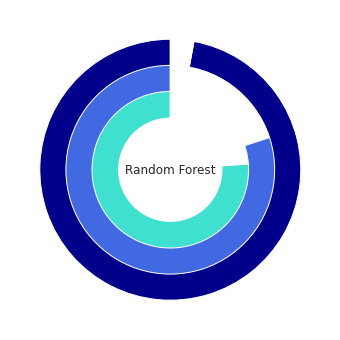

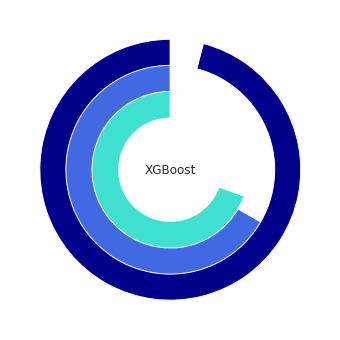

In [ ]:
# code to make donut plots for ppt and poster
for i in range(len(stats_df)):
    plt.figure(figsize = (6, 6))
    plt.pie([stats_df['Accuracy'].iloc[i], 100 - stats_df['Accuracy'].iloc[i]], startangle = 90, colors = ['darkblue', 'white'])
    plt.pie([stats_df['Precision'].iloc[i], 100 - stats_df['Precision'].iloc[i]], startangle = 90, colors = ['royalblue', 'white'], radius = 0.8)
    plt.pie([stats_df['F1 score'].iloc[i], 100 - stats_df['F1 score'].iloc[i]], startangle = 90, colors = ['turquoise', 'white'], radius = 0.6)
    centre_circle = plt.Circle((0, 0), 0.4, color = 'white', linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.text(0, 0, f'{(stats_df.iloc[i][-1])}', verticalalignment = 'center', horizontalalignment = 'center')
    plt.show()

# inner circle shows F1 score
# middle circle shows Precision
# outer circle shows Accuracy

## From the above analysis, the Random Forest model is the best model as:
<h3>1. It has the maximum accuracy along with Bagging at 97.09%<br>
2. It produces the same amount of false negatives and has a recall at 72.73% same as all models<br>
3. The decison trees are decorrelated as compared to bagging leading to lesser variance and greater ability to generalise</h3>

### We can also use XGboost model with a lower threshold producing more false positives but zero false negatives which is extremely desirable while detecting cancer.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Random forest model inferences:
### 1. With a precison of 80%, when it predicts a person has cancer, the model is correct 80% of the time.
### 2. With a recall of 72.73%, the model correctly identifies 72.7% of total cervical cancer cases.
### 3. The model is accurate 97.1% of the time

![](./final_poster.png)